# Prática 01 - Tratamento de Dados - Preparação de Dados para Machine Learning




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

## Parte I - Análise Exploratória dos Dados  (AED)



In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Estatísticas descritivas
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Contagem de valores para cada categoria de 'Survived'
print(titanic['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


<ipython-input-214-7c39ffd11490>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr()


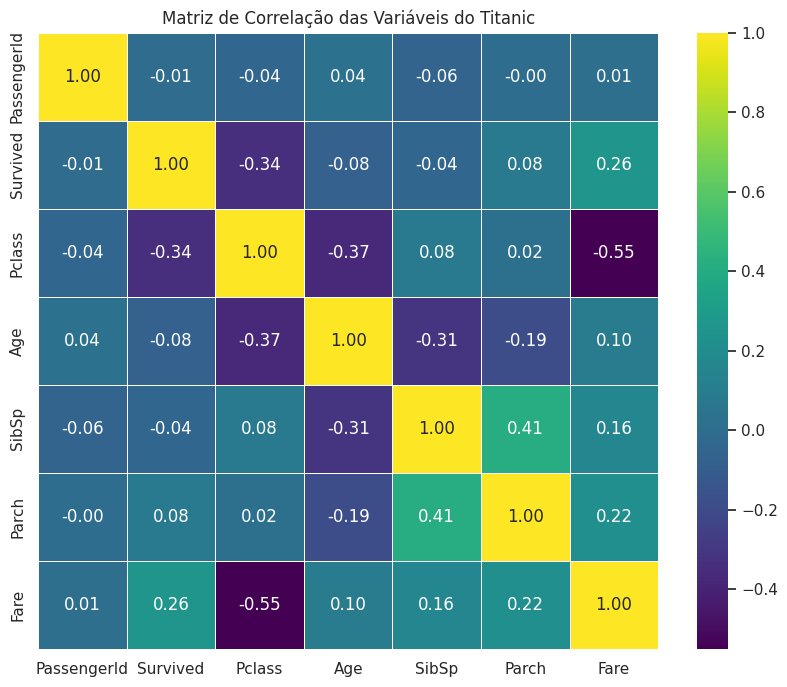

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = titanic.corr()

# Plotar o heatmap com uma paleta de cores diferente
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis do Titanic')
plt.show()

### Insight 01 -

Há um desbalanceamento significativo entre as classes dos passageiros e entre os gêneros, com a maioria dos passageiros na 3ª classe e a predominância do sexo masculino. Esses dados influenciam nas taxas de sobrevivência, sugerindo a importância da classe social e do gênero para a sobrevivência no desastre do Titanic.

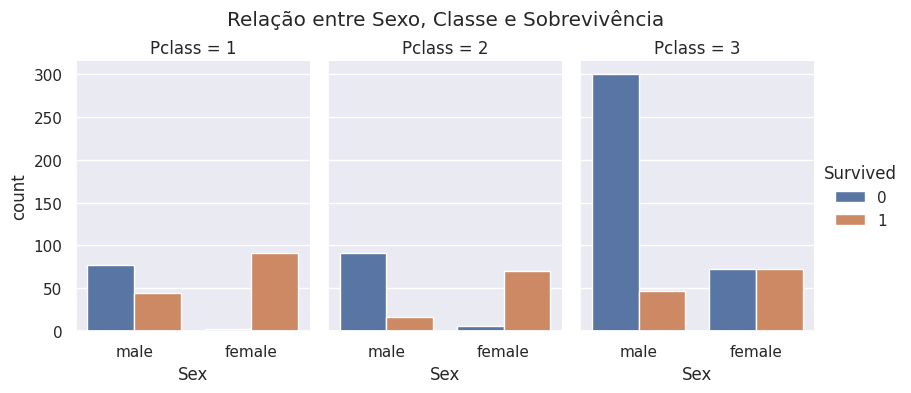

In [ ]:
#relação entre Sex, Pclasse e Survived
sns.set(style="darkgrid")
sns.catplot(x="Sex", hue="Survived", col="Pclass", data=titanic, kind="count", height=4, aspect=0.7)
plt.subplots_adjust(top=0.85)
plt.suptitle('Relação entre Sexo, Classe e Sobrevivência')
plt.show()

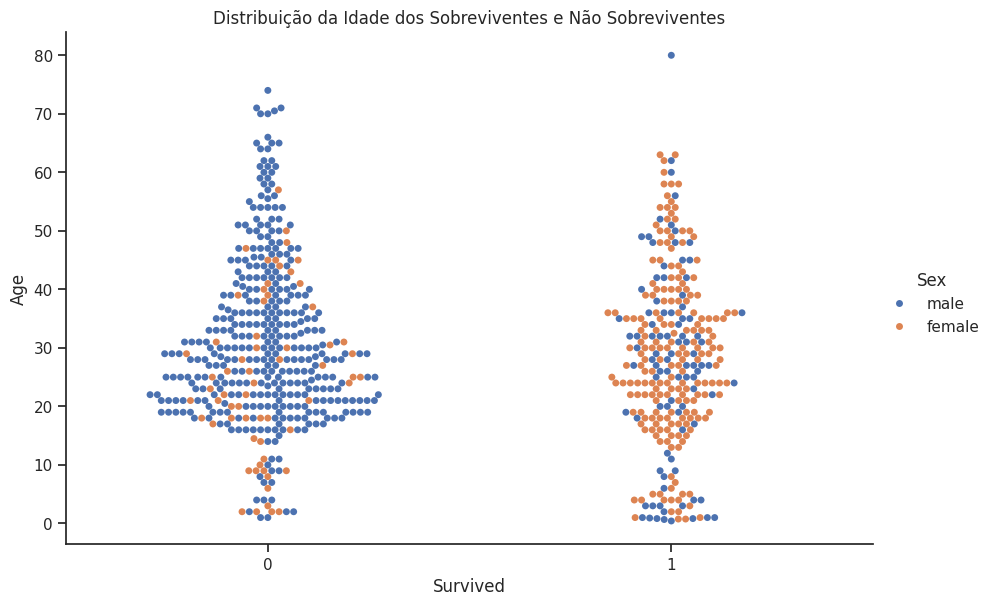

In [ ]:
sns.set(style="ticks")

sns.catplot(x="Survived", y="Age", hue="Sex", kind="swarm", data=titanic, height=6, aspect=1.5)
plt.title('Distribuição da Idade dos Sobreviventes e Não Sobreviventes')
plt.show()

### Insight 02 -

Vamos explorar a relação entre o número de irmãos/cônjuges a bordo (SibSp) e a classe de passageiro (Pclass). Para visualizar isso foi utilizado um gráfico de barras para mostrar a distribuição do número de irmãos/cônjuges a bordo em cada classe de passageiro:


Esse gráfico nos permitirá observar como o número de irmãos/cônjuges a bordo é distribuído entre as diferentes classes de passageiro. O insight que podemos obter é se há alguma diferença na distribuição de irmãos/cônjuges a bordo entre as classes de passageiro. Isso poderia indicar diferentes padrões de viagem ou preferências de família entre os passageiros de diferentes classes.

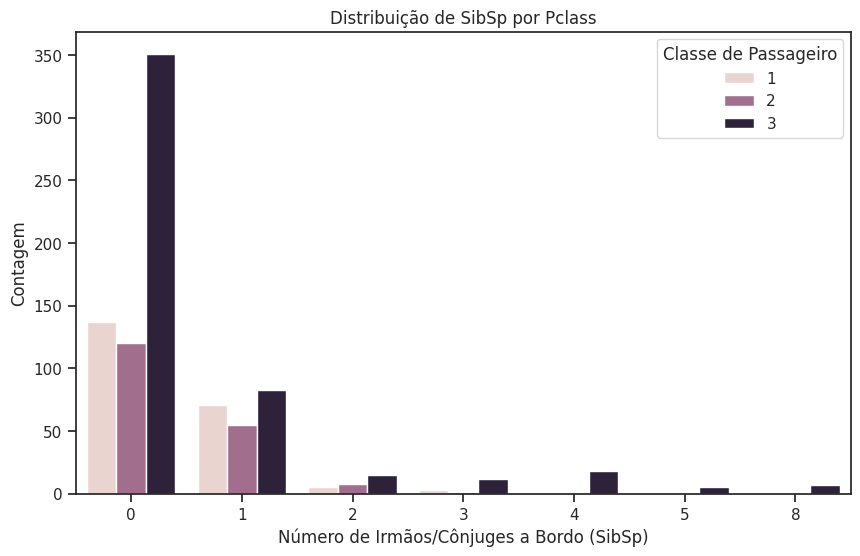

In [ ]:
# Plotar a distribuição do número de irmãos/cônjuges a bordo (SibSp) por classe de passageiro (Pclass)
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='SibSp', hue='Pclass')
plt.title('Distribuição de SibSp por Pclass')
plt.xlabel('Número de Irmãos/Cônjuges a Bordo (SibSp)')
plt.ylabel('Contagem')
plt.legend(title='Classe de Passageiro')
plt.show()

## Parte II - Tratamento dos Dados

### Limpeza do Dataset

Para a coluna Age: substituição dos valores ausentes pela média das idades.

In [ ]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

Para a coluna Embarked: dado que apenas 2 valores estão ausentes, o dado nulo vai ser alterado pelo ponto mais comum.

In [ ]:
# Identificando o porto mais comum
most_common_port = titanic['Embarked'].mode()[0]

# Substituindo os valores ausentes pelo porto mais comum
titanic['Embarked'].fillna(most_common_port, inplace=True)

A coluna Cabin foi removida devido ao grande número de dados ausentes.


In [ ]:
# Remover a coluna Cabin
titanic.drop('Cabin', axis=1, inplace=True)

As colunas Ticket, PassengerID e Name também foram removidas, pois não foram considerados importantes para fornecer insights diretos para a análise ou modelagem preditiva.

In [ ]:
# Remover a coluna PassengerID
titanic.drop('PassengerId', axis=1, inplace=True)
# Remover a coluna Ticket
titanic.drop('Ticket', axis=1, inplace=True)
# Remover a coluna Name
titanic.drop('Name', axis=1, inplace=True)

Além disso, também foi removida a coluna Fare, pois não deverá ser utilizada para insights e seus dados estavam em float:

In [ ]:
titanic.drop('Fare', axis=1, inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### Algumas informações úteis sobre o tipo de dados e valores nulos

In [ ]:
# Visão geral estatística do conjunto de dados
titanic_desc = titanic.describe()

# Contagem de valores para algumas variáveis categóricas
survived_count = titanic['Survived'].value_counts()
pclass_count = titanic['Pclass'].value_counts()
sex_count = titanic['Sex'].value_counts()
print("\n\n")
# Verificando a quantidade de valores nulos por coluna
missing_values = titanic.isnull().sum()

titanic_desc, survived_count, pclass_count, sex_count, missing_values

(         Survived      Pclass         Age       SibSp       Parch
 count  891.000000  891.000000  891.000000  891.000000  891.000000
 mean     0.383838    2.308642   29.361582    0.523008    0.381594
 std      0.486592    0.836071   13.019697    1.102743    0.806057
 min      0.000000    1.000000    0.420000    0.000000    0.000000
 25%      0.000000    2.000000   22.000000    0.000000    0.000000
 50%      0.000000    3.000000   28.000000    0.000000    0.000000
 75%      1.000000    3.000000   35.000000    1.000000    0.000000
 max      1.000000    3.000000   80.000000    8.000000    6.000000,
 0    549
 1    342
 Name: Survived, dtype: int64,
 3    491
 1    216
 2    184
 Name: Pclass, dtype: int64,
 male      577
 female    314
 Name: Sex, dtype: int64,
 Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Embarked    0
 dtype: int64)

### Análise básica das colunas restantes

Para a análise básica, será examinada a relação entre sobrevivência e classe do passageiro (Pclass), sobrevivência e sexo (Sex), e a distribuição da idade (Age).

Relação entre Sobrevivência e Classe do Passageiro (Pclass): Com o gráfico de barras podemos visualizar a proporção de sobreviventes em cada classe.

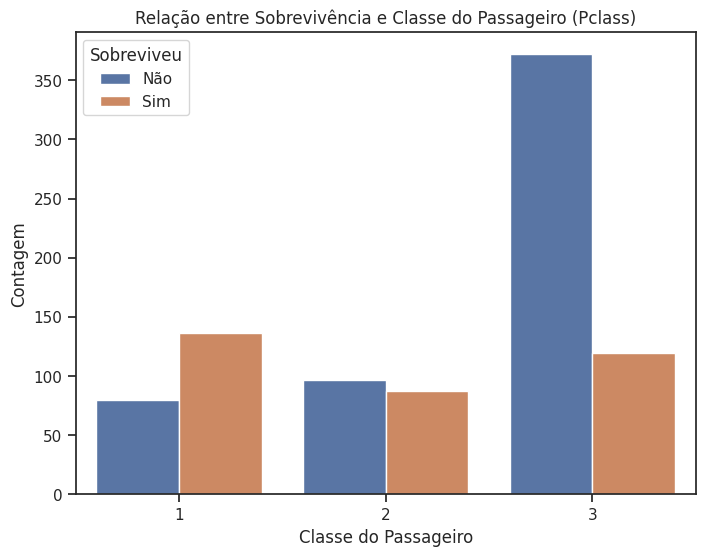

In [ ]:
# Visualizar a relação entre sobrevivência e classe do passageiro (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Relação entre Sobrevivência e Classe do Passageiro (Pclass)')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

Relação entre Sobrevivência e Sexo (Sex): Também pode ser visualizado com um gráfico de barras para mostrar a proporção de sobreviventes por sexo.

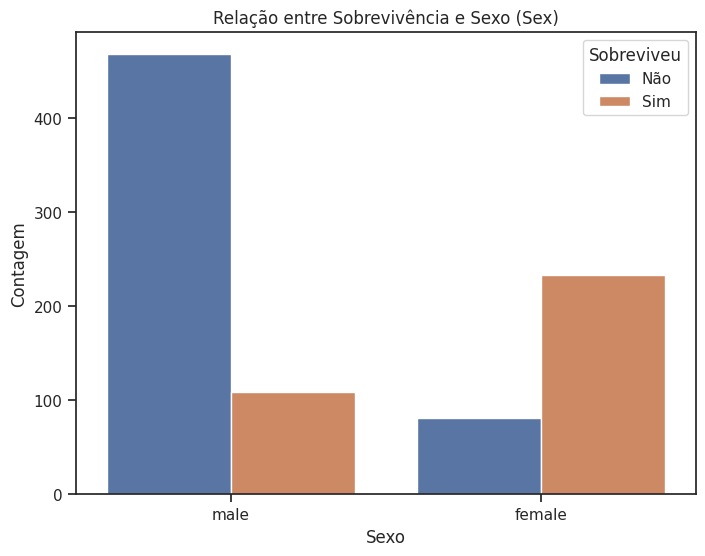

In [ ]:
# Visualizar a relação entre sobrevivência e sexo (Sex)
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Relação entre Sobrevivência e Sexo (Sex)')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

Distribuição da Idade (Age): Com o histograma podemos visualizar a
distribuição da idade.

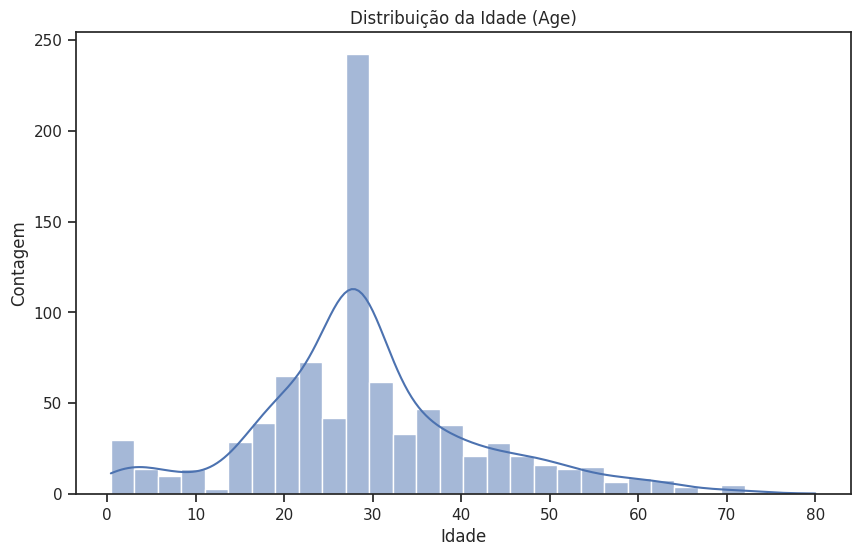

In [ ]:
# Visualizar a distribuição da idade (Age)
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Distribuição da Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

### Transformação dos atributos para a possível criação de um modelo de ML

Para transformar os dados categóricos em numéricos, foi utilizado codificação. Por exemplo, podemos transformar a coluna Sex em uma coluna numérica onde male = 0 e female = 1. Para Embarked, que tem três categorias, substituimos S por 1, Q por 2 e C por 3.

Começando com a análise básica das colunas restantes e depois com a transformação dos dados para modelagem de ML.

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


Para a coluna Sex:

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

Para a coluna Embarked:

In [ ]:
titanic['Embarked'].replace({'S': 1, 'Q': 2, 'C': 3}, inplace=True)

Para a coluna Age, que estava em Float, esse código foi utilizado para transformá-lo em inteiro:

In [ ]:
titanic['Age'] = titanic['Age'].astype(int)

Dataset após as alterações:

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,1
1,1,1,1,38,1,0,3
2,1,3,1,26,0,0,1
3,1,1,1,35,1,0,1
4,0,3,0,35,0,0,1


## Parte III - Pré-processamento dos Dados


In [ ]:
titanic_cleaned = titanic.copy()
# Separando as features (X) e o target (y)
X = titanic_cleaned.drop('Survived', axis=1)  #Tudo menos Survived
y = titanic_cleaned['Survived']  #Apenas Survived

In [ ]:
# train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Pré-processamento dos dados

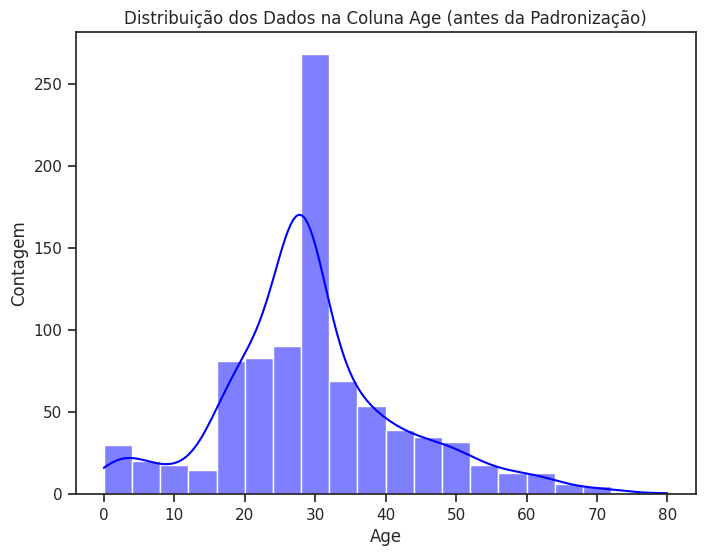

In [ ]:
# Visualizar a distribuição dos dados na coluna 'Age' antes da padronização
plt.figure(figsize=(8, 6))
sns.histplot(titanic_cleaned['Age'].dropna(), bins=20, kde=True, color = 'blue')
plt.title('Distribuição dos Dados na Coluna Age (antes da Padronização)')
plt.xlabel('Age')
plt.ylabel('Contagem')
plt.show()

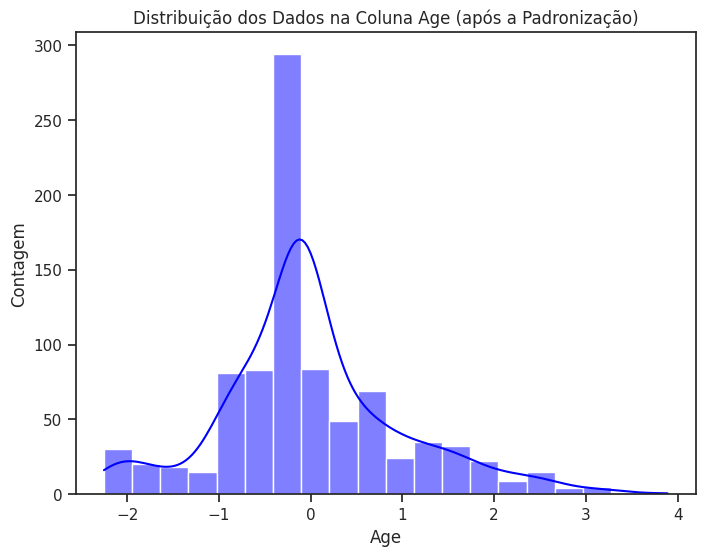

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instanciar o objeto StandardScaler
scaler = StandardScaler()

# Padronizar os dados na coluna 'Age'
titanic_cleaned['Age'] = scaler.fit_transform(titanic_cleaned['Age'].values.reshape(-1, 1))

# Visualizar a distribuição dos dados na coluna 'Age' após a padronização
plt.figure(figsize=(8, 6))
sns.histplot(titanic_cleaned['Age'], bins=20, kde=True, color = 'blue')
plt.title('Distribuição dos Dados na Coluna Age (após a Padronização)')
plt.xlabel('Age')
plt.ylabel('Contagem')
plt.show()

Dados finais nas seguintes variaveis:

In [ ]:
X_train = titanic_cleaned.drop(['Survived', 'Age'], axis=1)
X_test = titanic_cleaned.drop(['Survived', 'Age'], axis=1)
y_train = titanic_cleaned['Survived']
y_test = titanic_cleaned['Survived']

# Prints
print("Conjunto de treinamento - X_train:")
print(X_train.head(5))
print("\nConjunto de teste - X_test:")
print(X_test.head(5))
print("\nLabels para o conjunto de treinamento - y_train:")
print(y_train.head(5))
print("\nLabels para o conjunto de teste - y_test:")
print(y_test.head(5))

Conjunto de treinamento - X_train:
   Pclass  Sex  SibSp  Parch  Embarked
0       3    0      1      0         1
1       1    1      1      0         3
2       3    1      0      0         1
3       1    1      1      0         1
4       3    0      0      0         1

Conjunto de teste - X_test:
   Pclass  Sex  SibSp  Parch  Embarked
0       3    0      1      0         1
1       1    1      1      0         3
2       3    1      0      0         1
3       1    1      1      0         1
4       3    0      0      0         1

Labels para o conjunto de treinamento - y_train:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Labels para o conjunto de teste - y_test:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
